# Practice Session 04: Weighted Networks


In this session we will reconstruct the World Trade Web using [NetworkX](https://networkx.github.io/), a Python package. This practice is inspired by a paper analysing the Topology of the World Trade Web (https://arxiv.org/abs/cond-mat/0301015).

You will alo be plotting networks and data using [matplotlib](https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html).

The dataset we will use comes from OECD's [quarterly international trade statistics](https://stats.oecd.org/Index.aspx?DataSetCode=QITS#) dataset, and these are your input files:

* ``trade-2022-flows.csv`` international trade in 2022
* ``trade-countries.csv`` list of countries and territories

**Important:** Remember to check you are using version 3.5 of networkx.

# 1. Read mapping of codes to country names

Read into variable ``id2name`` the file containing the list of countries and territories.

This is a tab-separated file with two columns: *code*, which is a letter code (e.g. ``PRT``),  and *name* (e.g., ``Portugal``).

You can use the following code snippet to read a compressed file:

```python
# Open a file for reading in text mode
with open(FILENAME, "rt") as input_file:

    # Create a CSV reader for a tab-delimited file with a header
    reader = csv.DictReader(input_file, delimiter='\t')
    
    # Iterate through records, each record is a dictionary
    for record in reader:
        print(record)
```

In [46]:
pip install matplotlib networkx numpy pandas seaborn

Note: you may need to restart the kernel to use updated packages.


In [47]:
import csv
import io
import networkx as nx
import matplotlib.pyplot as plt
import math
import pandas as pd

In [48]:
# Ensure the paths to the files are correct

INPUT_NAMES_FILENAME = "data/trade-flows/trade-countries.csv"
INPUT_TRADE= "data/trade-flows/trade-2022-flows.csv"
YEAR = 2022

In [49]:
id2name = {}

In [50]:
# Open a file for reading in text mode
with open(INPUT_NAMES_FILENAME, "rt") as input_file:

    # Create a CSV reader for a tab-delimited file with a header
    reader = csv.DictReader(input_file, delimiter='\t')
    
    # Iterate through records, each record is a dictionary
    for record in reader:
        id2name[record['code']] = record['name']

Test the mapping using the following code.

In [51]:
# LEAVE AS-IS, it should print "Finland"

print(id2name["FIN"])

Finland


# 2. Read flows data into a graph

## 2.1. Create a weighted directed graph

The file `INPUT_TRADE` contains three columns:

* from (country from which the goods or services are exported)
* to (country that receives the goods or services)
* amount (total amount in USD)

Take into account that exports from one country to a second one are the imports of the second one from the first.

Create a NetworkX directed weighted graphs as `g_trade` with 'amount' as the weight of the edges and the nodes named with the country codes.

You can create an empty graph using:

```python
g = nx.DiGraph()
```

By default the columns read by a DictReader are string, but you can convert the column containing the amount exported to a floating point number by using `float()`. Divide the `amount` by one million and round to the nearest integer (you can use the function `round()`), so the weights will be expressed in millions of dollars. Make sure to include only positive values.

**Important:** create only the nodes corresponding to countries listed in ``INPUT_NAMES_FILENAME`` (keys in ``id2name``)

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

In [52]:
g_trade = nx.DiGraph()

with open(INPUT_TRADE, "r", encoding="utf-8") as f:
    reader = csv.DictReader(f, delimiter="\t")  
    for row in reader:
        source = row["from"]
        target = row["to"]
        weight = round(float(row["amount"])/1000000)

        if source in id2name and target in id2name:
            if weight > 0:
                g_trade.add_edge(source, target, weight=weight)

print(f"Número de nodos: {g_trade.number_of_nodes()}")
print(f"Número de aristas: {g_trade.number_of_edges()}")


Número de nodos: 33
Número de aristas: 823


<font size="+1" color="red">Replace this cell with your code to create the graph g_trade.</font>

In [53]:
# LEAVE AS IS

print("The {:d} graph contains {:d} nodes and {:d} edges with a total weight of {:,d} million USD".format(YEAR, g_trade.number_of_nodes(),g_trade.size(),sum(d.get("weight", 0) for u, v, d in g_trade.edges(data=True))))


The 2022 graph contains 33 nodes and 823 edges with a total weight of 7,564,211 million USD


This code should have printed:

```
The 2022 graph contains 33 nodes and 823 edges with a total weight of 7,564,211 million USD
```

If it prints more than that, perhaps you read some edges having one of the two nodes outside of the list of countries.

In [54]:
# LEAVE AS-IS

for exporter in ["GBR","AUS", "USA",]:
    for importer in ["GBR","AUS", "USA",]:
      if importer!= exporter:
          print("In {:d}, {:s} ({:s}) exported to {:s} ({:s}) goods and services worth {:,d} million USD".format(
              YEAR, exporter, id2name[exporter], importer, id2name[importer],
                g_trade.get_edge_data(exporter, importer)["weight"]) )

          print("")


In 2022, GBR (United Kingdom) exported to AUS (Australia) goods and services worth 5,447 million USD

In 2022, GBR (United Kingdom) exported to USA (United States) goods and services worth 64,392 million USD

In 2022, AUS (Australia) exported to GBR (United Kingdom) goods and services worth 2,071 million USD

In 2022, AUS (Australia) exported to USA (United States) goods and services worth 12,374 million USD

In 2022, USA (United States) exported to GBR (United Kingdom) goods and services worth 77,261 million USD

In 2022, USA (United States) exported to AUS (Australia) goods and services worth 30,198 million USD



It should have printed:

```
In 2022, GBR (United Kingdom) exported to AUS (Australia) goods and services worth 5,447 million USD

In 2022, GBR (United Kingdom) exported to USA (United States) goods and services worth 64,392 million USD

In 2022, AUS (Australia) exported to GBR (United Kingdom) goods and services worth 2,071 million USD

In 2022, AUS (Australia) exported to USA (United States) goods and services worth 12,374 million USD

In 2022, USA (United States) exported to GBR (United Kingdom) goods and services worth 77,261 million USD

In 2022, USA (United States) exported to AUS (Australia) goods and services worth 30,198 million USD

```

## 2.2. Compute totals

Next, compute the total exports of each country, into a dictionary: `exports`, with keys being country codes, and values being total exports. Do the same with total imports, into the variable `imports`.

To iterate through the nodes of a graph, you can use:

```python
for n in g.nodes():
    # n is the name of the node
```

To create a dictionary `dic` initialized so that all keys are the elements of set `s` and all values are zero:

```python
dic = dict([(element,0) for element in s])
```

To avoid code duplication, create a function `sum_weights(graph, direction, weight_key)`. This function should receive a *graph*, a *direction* ("in" or "out"), and a *weight_key*, defaulting to "weight".


<font size="+1" color="red">Replace this cell with your code to compute totals into dictionaries exports and imports. Create a function *sum_weights* to avoid code duplication.</font>


In [76]:
def sum_weights(graph, direction, weight_key="weight"):
    dict_total = dict((n, 0) for n in graph.nodes())
    for n in graph.nodes():
        total_n = 0
        if direction == "out":
            edges = graph.out_edges(n, data=True)
        elif direction == "in":
            edges = graph.in_edges(n, data=True)
        else:
            raise ValueError("direction must be 'in' or 'out'")
        
        for u, v, edge_data in edges:
            total_n += edge_data.get(weight_key, 0)

        dict_total[n] = total_n
    
    return dict_total


# exports and imports
exports = sum_weights(g_trade, "out")
imports = sum_weights(g_trade, "in")

print(exports)


{'AUS': 97914, 'AUT': 177134, 'BEL': 383111, 'CAN': 531428, 'CHE': 273772, 'CHL': 33794, 'CZE': 214859, 'DEU': 1284888, 'DNK': 85535, 'ESP': 313679, 'EST': 14312, 'FIN': 0, 'FRA': 472845, 'GBR': 363209, 'GRC': 29942, 'HUN': 0, 'IRL': 190680, 'ISL': 6849, 'ISR': 0, 'ITA': 0, 'JPN': 271553, 'LUX': 0, 'MEX': 497662, 'NLD': 0, 'NOR': 251346, 'NZL': 18263, 'POL': 284378, 'PRT': 69610, 'SVK': 93586, 'SVN': 0, 'SWE': 161720, 'TUR': 133088, 'USA': 1309054}


In [63]:
# LEAVE AS-IS

for country in ['GBR', 'AUS', 'USA']:
    print("In {:d} {:s} exported goods and services worth {:,d} Million USD ,and imported goods and services worth {:,d} Million USD \n for a total trade balance of {:,d} Million USD.".format(
    YEAR, id2name[country], exports[country], imports[country], exports[country]-imports[country]
    ))
    print()

In 2022 United Kingdom exported goods and services worth 363,209 Million USD ,and imported goods and services worth 433,529 Million USD 
 for a total trade balance of -70,320 Million USD.

In 2022 Australia exported goods and services worth 97,914 Million USD ,and imported goods and services worth 93,347 Million USD 
 for a total trade balance of 4,567 Million USD.

In 2022 United States exported goods and services worth 1,309,054 Million USD ,and imported goods and services worth 1,631,960 Million USD 
 for a total trade balance of -322,906 Million USD.



It should print:

```
In 2022 United Kingdom exported goods and services worth 363,209 Million USD ,and imported goods and services worth 433,529 Million USD
 for a total trade balance of -70,320 Million USD.

In 2022 Australia exported goods and services worth 97,914 Million USD ,and imported goods and services worth 93,347 Million USD
 for a total trade balance of 4,567 Million USD.

In 2022 United States exported goods and services worth 1,309,054 Million USD ,and imported goods and services worth 1,631,960 Million USD
 for a total trade balance of -322,906 Million USD.
```

# 3. Draw the trade graph

Draw a directed graph using NetworkX with the following characteristics.

* Node size proportional to total exports.
* Directed links proportional to net trade. Plot only positive net trade values. Width also proportional to net trade.
* Use a spring model layout.
* Make sure arrow heads are visible.

You can use the following Networkx functions:

* `nx.spring_layout(g, iterations=100, weight=, k=)`
* `nx.draw_networkx_nodes(g, positions, node_color=, alpha=,node_size=)`
* `nx.draw_networkx_edges(g, pos, edgelist=, width=, edge_color=, arrows=True, min_source_margin=0, min_target_margin=)`
* `nx.draw_networkx_labels(g, pos, font_color=)`

Tune the parameter k and the size of the nodes to avoidd overlap.

Tip: a good value for the min_target_margin attribute in nx.draw_networkx_edges is $\sqrt(node\_size/\pi)$ where node_size is the same value as in the nx.draw_networkx_nodes() attribute


[('AUS', 'CHL'), ('AUS', 'FIN'), ('AUS', 'HUN'), ('AUS', 'ISL'), ('AUS', 'ISR'), ('AUS', 'ITA'), ('AUS', 'JPN'), ('AUS', 'LUX'), ('AUS', 'NLD'), ('AUS', 'NZL'), ('AUS', 'POL'), ('AUS', 'SVN'), ('AUS', 'TUR'), ('AUT', 'AUS'), ('AUT', 'CAN'), ('AUT', 'CHE'), ('AUT', 'CHL'), ('AUT', 'DNK'), ('AUT', 'ESP'), ('AUT', 'EST'), ('AUT', 'FIN'), ('AUT', 'FRA'), ('AUT', 'GBR'), ('AUT', 'GRC'), ('AUT', 'HUN'), ('AUT', 'IRL'), ('AUT', 'ISL'), ('AUT', 'ISR'), ('AUT', 'ITA'), ('AUT', 'JPN'), ('AUT', 'LUX'), ('AUT', 'MEX'), ('AUT', 'NLD'), ('AUT', 'NOR'), ('AUT', 'NZL'), ('AUT', 'POL'), ('AUT', 'PRT'), ('AUT', 'SVK'), ('AUT', 'SVN'), ('AUT', 'SWE'), ('AUT', 'TUR'), ('AUT', 'USA'), ('BEL', 'AUS'), ('BEL', 'AUT'), ('BEL', 'CHE'), ('BEL', 'DEU'), ('BEL', 'DNK'), ('BEL', 'EST'), ('BEL', 'FIN'), ('BEL', 'FRA'), ('BEL', 'GBR'), ('BEL', 'GRC'), ('BEL', 'HUN'), ('BEL', 'ISL'), ('BEL', 'ISR'), ('BEL', 'ITA'), ('BEL', 'JPN'), ('BEL', 'LUX'), ('BEL', 'MEX'), ('BEL', 'NLD'), ('BEL', 'NZL'), ('BEL', 'POL'), ('BEL',

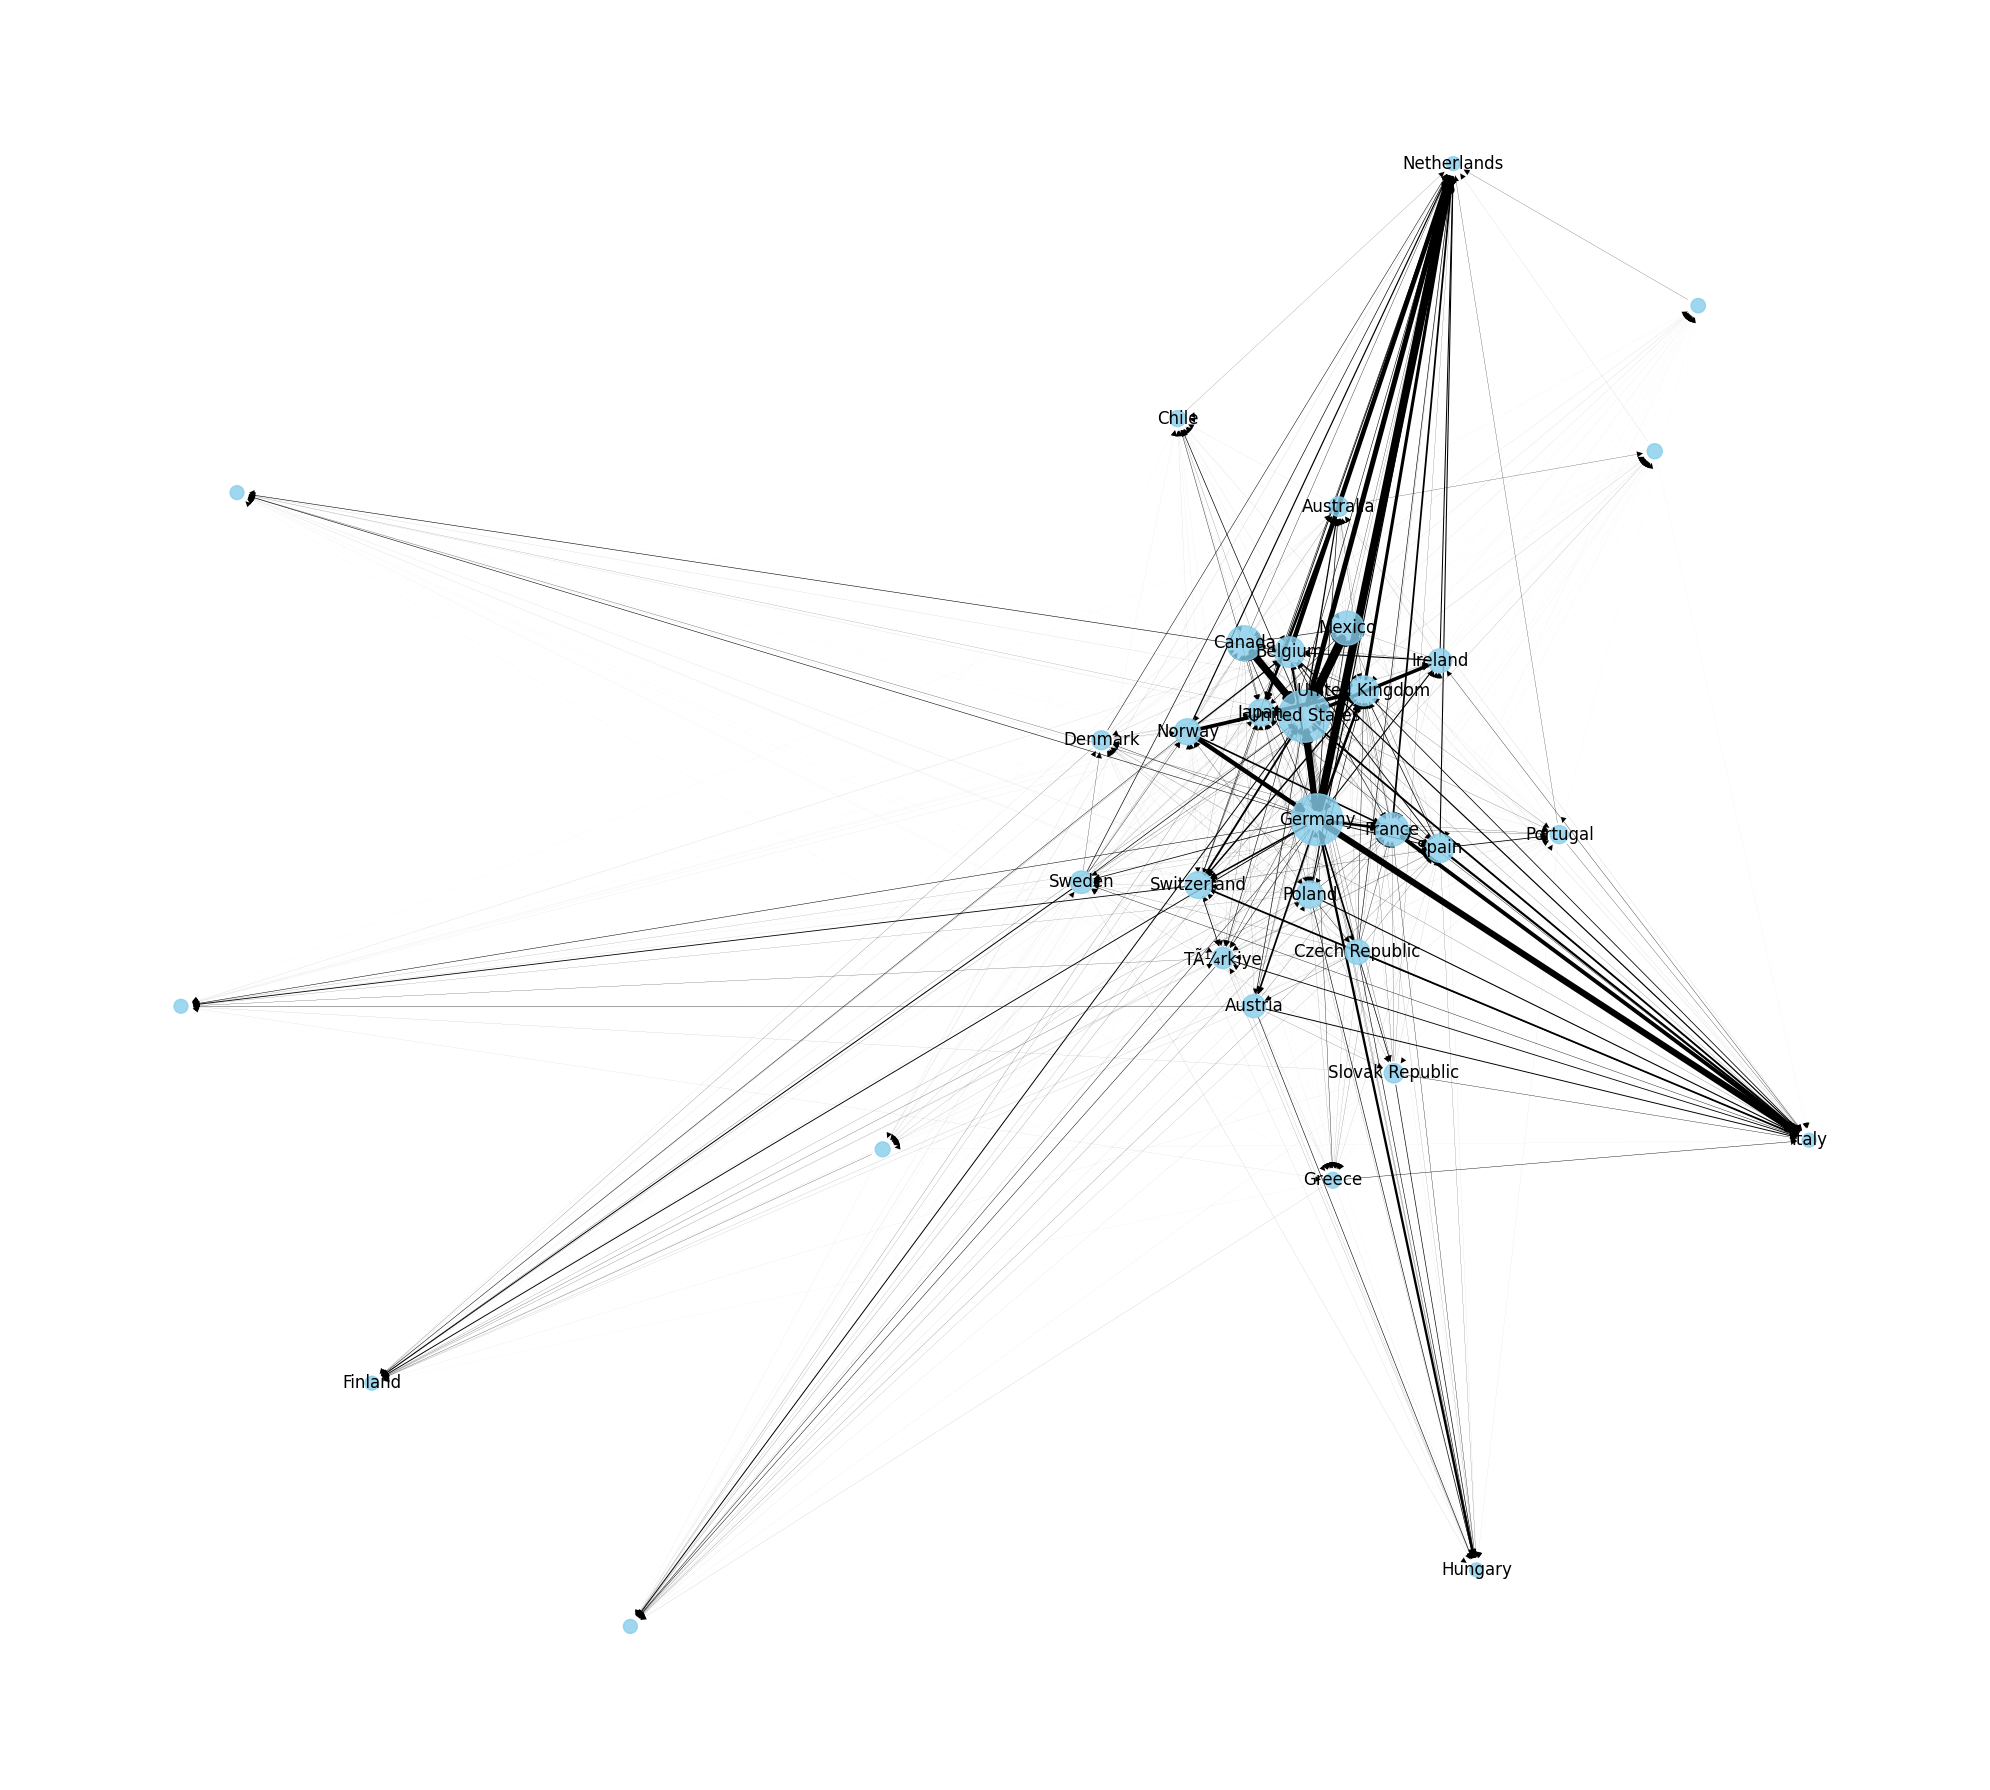

In [105]:
pos = nx.spring_layout(g_trade, weight='weight', iterations=300, k=70, seed=42)
plt.figure(figsize=(20, 18))

node_sizes = [100 + exports[n]*0.001 for n in g_trade.nodes()]  

labels = {n: id2name[n] for n in g_trade.nodes() if exports[n] + imports[n] > 50000}

edge_list = []
edge_weights = []
for u, v in g_trade.edges():
    w_uv = g_trade[u][v]['weight']
    w_vu = g_trade[v][u]['weight'] if g_trade.has_edge(v, u) else 0
    net_trade = w_uv - w_vu
    if net_trade > 0:
        edge_list.append((u, v))
        edge_weights.append(net_trade)

print(edge_list)
print(edge_weights)

min_target_margin = [math.sqrt(s / math.pi) for s in node_sizes]


nx.draw_networkx_edges(
    g_trade, pos,
    edgelist=edge_list,
    width=[w * 0.00005 for w in edge_weights],
    edge_color='black',
    alpha=1,
    arrows=True,
    min_source_margin=0,
    min_target_margin=min(min_target_margin)  
)

nx.draw_networkx_nodes(
    g_trade, pos,
    node_color='skyblue',
    alpha=0.8,
    node_size=node_sizes
)

nx.draw_networkx_labels(
    g_trade, pos,
    labels=labels,
    font_color='black'
)

plt.axis('off')
plt.tight_layout()
plt.show()


This graph visualizes the global trade balance between countries, focusing on this balance with exports and imports.

Major Trading Countries by Export Volume. We can consider with the variable that we put that it is label if the exports + imports are bigger than 50000.

United States is one of the biggest nodes and it is situate in the middle of the plot.

Países Bajos, Italia, Hungria y España, todos con múltiples conexiones gruesas, lo que indica que también tienen un papel importante como exportadores.

# 4. Comparison of export and import scores

Now, we will compare the imports and exports of different countries.

We can do this visually by plotting both in log-log scale. You can use the following code snippet, which assumes we are plotting dictionary *a* against dictionary *b*. **Do not forget to filter out cases where values of *a* or *b* are 0**:

```python
# Create log-log plot
plt.figure(figsize=(20,10))
plt.loglog()
plt.xlabel("x axis label", {'size': '22'})
plt.ylabel("y axis label", {'size': '22'})

# Add a diagonal line
plt.plot([min(a.values()),max(a.values())], [min(b.values()),max(b.values())], '-.', lw=2)

# Do the scatter plot with texts
for country in set(a.keys()).intersection(set(b.keys())):
    plt.text(a[country], b[country], country, {'size': '12'})
```

Remember to add labels to the x axis and y axis before delivering your plots, and to use a function (name it `plot_scatter`) to draw your plots: do not duplicate code.


In [101]:
def plot_scatter(a, b, xlabel="X-axis", ylabel="Y-axis", figsize=(20, 10)):
    # Filter out zero or missing values
    common_keys = set(a.keys()).intersection(set(b.keys()))
    filtered_keys = [k for k in common_keys if a[k] > 0 and b[k] > 0]

    if not filtered_keys:
        print("No valid data points to plot.")
        return
    
    # Extract values
    a_vals = [a[k] for k in filtered_keys]
    b_vals = [b[k] for k in filtered_keys]

    plt.figure(figsize=figsize)
    plt.loglog()  

    plt.xlabel(xlabel, {'size': '22'})
    plt.ylabel(ylabel, {'size': '22'})

    plt.plot([min(a_vals), max(a_vals)], [min(b_vals), max(b_vals)], '-.', lw=2)

    # Scatter plot
    for k in filtered_keys:
        plt.text(a[k], b[k], k, {'size': '12'})
    
    plt.grid(True, which="both", ls="--", lw=0.5)
    plt.show()


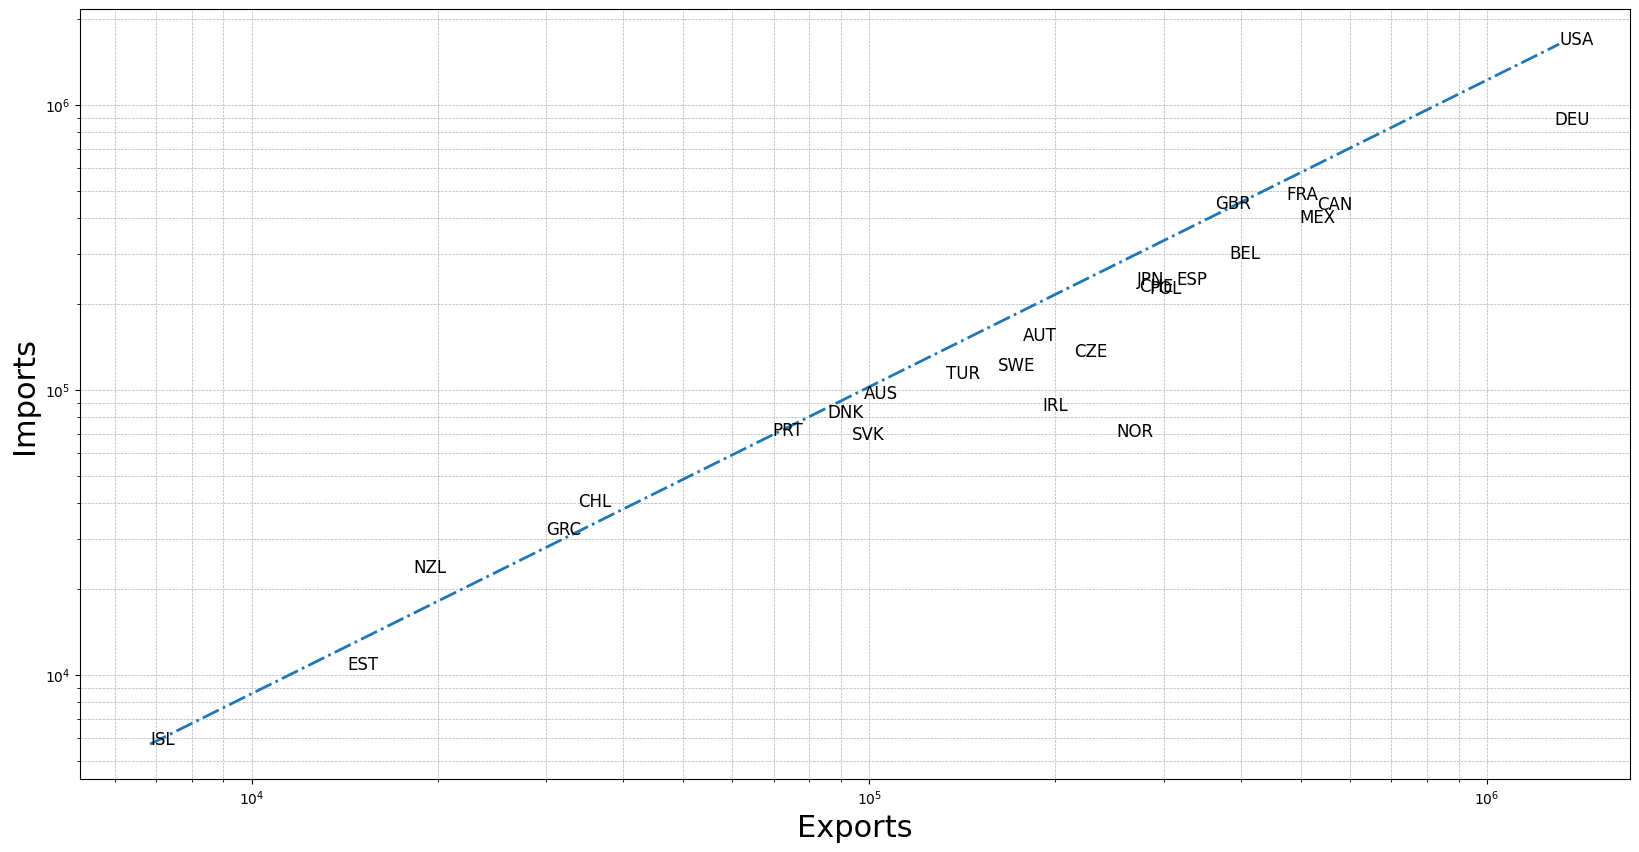

In [102]:
plot_scatter(exports, imports, xlabel="Exports", ylabel="Imports")


Countries with a big values in export: Nations like Germany (DEU), Norway (NOR) or Spain (ESP) have levels of exports surpassing the level of imports (shown by the dotted line). This indicates a strong positive trade balance.

Countries with a Deficit (Strong Importers): Countries like the NZL or the United Kingdom (GBR) have import levels that are higher than their exports, resulting in a trade deficit.

We can show the case of Ireland (IRL): Ireland stands out with a high level of exports relative to its importations, giving it a large trade surplus.

# DELIVER (individually)

A .zip file containing:

* This notebook.


<font size="+2" color="#003300">I hereby declare that, except for the code provided by the course instructors, all of my code, report, and figures were produced by myself.</font>